# Lab Exersice 1
*Author: Jakob Heller + Die Gang* 


## DFT and Windowing
## Exercise: Windowing of a harmonic signal

a) Generate two sine signals of  $f_1=200$ Hz and $f_2 = 200.25$ Hz and amplitude $|x[k]|_{max} = 1$
for the sampling rate $f_s = 800$ Hz in the range of $0 ≤ k < N = 1600$ .

In [112]:
%matplotlib inline 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# generate the 3 frequencies
f1=200 # Hz
f2=200.25 # Hz
fs=800 #Hz

# Range
N=1600 #int

#maximum amplitude
maxamp=1

#k=kappa the time domain index (array from 0 to Range in N/fs steps)
k = np.arange(0, N, 1)

#create sines
y1 = maxamp * np.sin(2 * np.pi * f1 * k/fs)
y2 = maxamp * np.sin(2 * np.pi * f2 * k/fs)


#plt.plot(k,y2)

b) Generate a rectangular window, a Hanning window and a flat top window with the same length as the sine signals.

In [113]:
w_rect= np.ones(N) #rectangle windowfunction
w_hanning= np.hanning(N) #hanning window
w_flat_top=signal.flattop(N) #flat top window

c) Window both sine signals with the three windows and calculate the DFT spectra. <br />
d) Plot the absolute value of the DFT spectra in $dB$ as in fig. $1$, $2$ and $3$. Pay attention
to using the same normalisation: The DFT values apart from DC and $f_s/2$  have to be
normalised with $2/N$ before calculating the logarithm to achieve physically interpretable
spectra.

In [114]:
#we define a function for windowing and DFT spectra plotting
def window_and_dft(f,w):
    
    N = len(f)
    
    #window the function with the signal
    wf=f*w #wf=windowedfunction
    
    # DFT of window function 
    WF = np.fft.fft(wf, N) #WF in this notation we use Majuskels for spectre domain #The lenght of the DTFT is N
   
    #normalisation with  2/N
    WFlog = 20*np.log10( abs(WF)*(2/N))
    
    #mu index for spectre domain
    plt.plot(WFlog)
    plt.axis([375, 425, -100, 5])





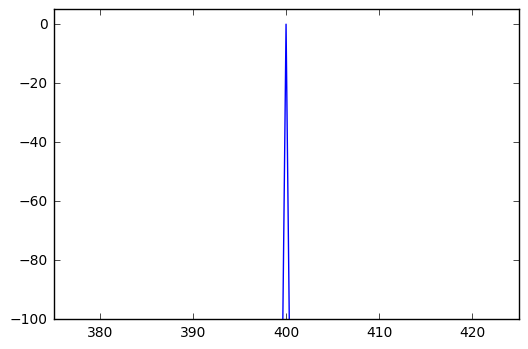

In [115]:
#window_and_dft all combinations of signals and windows
window_and_dft(y1,w_rect)

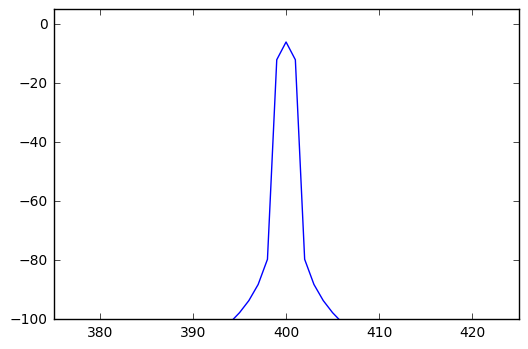

In [116]:
window_and_dft(y1,w_hanning)

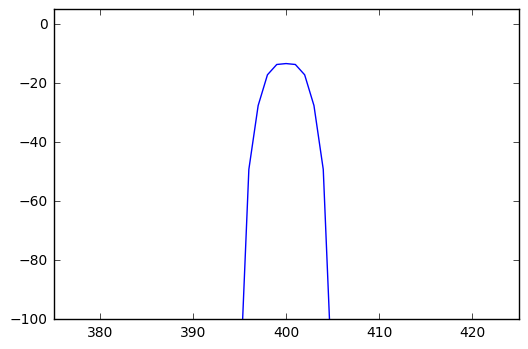

In [117]:
window_and_dft(y1,w_flat_top)

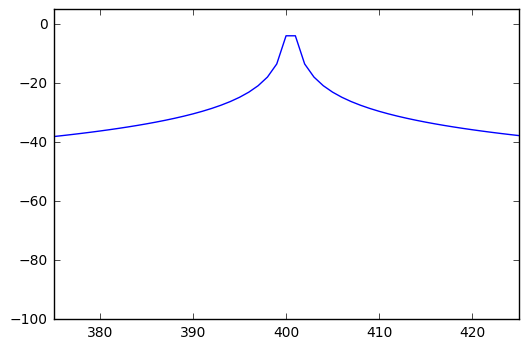

In [118]:
window_and_dft(y2,w_rect)

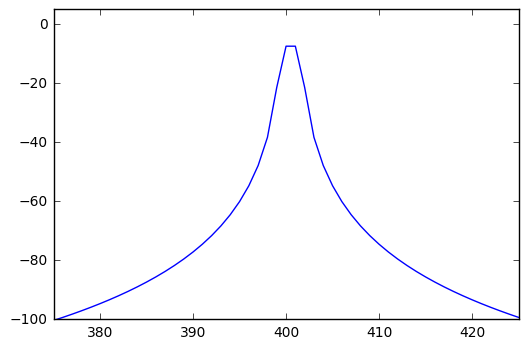

In [119]:
window_and_dft(y2,w_hanning)

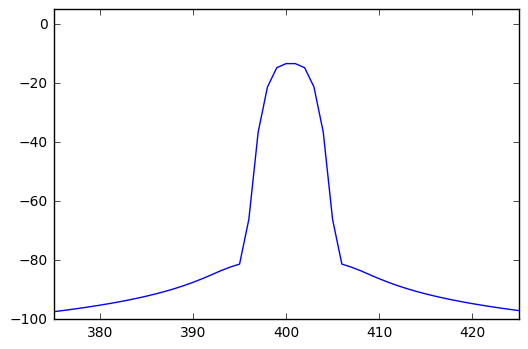

In [120]:
window_and_dft(y2,w_flat_top)

e) Plot the amplitude spectra of the three windows in dB normalised to their maximum. Use
zero-padding or the formulas for interpolation towards the DTFT to achieve a suficiently
high resolution of the spectra to show the characteristics of the windows.

f) Interpret the results of d) with the help of e) regarding the best and worst case for the
different windows. Why do the results for the signals with frequencies $f_1$ and $f_2$ differ?

g) Determine the width of the main lobe (at the $−3$ dB corner frequencies) and the attenuation of the highest side lobe from the window spectra. It might be useful to use wvtool
in Matlab.

h) Explain for which signal analysis task the rectangular window and the flat top window
should be used.

i) Do some research on your own: Which advantages exhibit the Kaiser-bessel (in Matlab:
kaiser ) and the Dolph-Chebyshev (in Matlab: chebwin ) window?